## 1. Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2. Data Collection
- The required data for this project is collected from the following kaggle dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Importing the necessary libraries for the EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

## 3. Information about Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check for duplicate values

In [5]:
df.duplicated().sum()

np.int64(0)

### Checking Unique number of values in each column

In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Finding the numerical and categorical columns

In [7]:
numerical_columns = [column for column in df.columns if df[column].dtype != 'object']
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']

print(f"Numerical columns({len(numerical_columns)}): {numerical_columns}")
print(f"Categorical columns({len(categorical_columns)}): {categorical_columns}")

Numerical columns(3): ['math_score', 'reading_score', 'writing_score']
Categorical columns(5): ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Statistical summary of the data

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Categorical summary of the data set

In [9]:
df.describe(include='object')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


### Finding Unique categorical values for each categorical column

In [10]:
gender_unique_values = df['gender'].unique()
race_ethnicity_unique_values = df['race_ethnicity'].unique()
ple_unique_values = df['parental_level_of_education'].unique()
lunch_unique_values = df['lunch'].unique()
test_prep_unique_values = df['test_preparation_course'].unique()

print(f"Values for gender: {gender_unique_values}")
print(f"Values for race/ethnicity: {race_ethnicity_unique_values}")
print(f"Values for parental_level_of_education: {ple_unique_values}")
print(f"Values for lunch: {lunch_unique_values}")
print(f"Values for test_preparation_course: {test_prep_unique_values}")

Values for gender: ['female' 'male']
Values for race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Values for parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Values for lunch: ['standard' 'free/reduced']
Values for test_preparation_course: ['none' 'completed']


### Overview of the dataset

- **gender**:Binary categorical value with 2 categories(male/female)
- **race/ethnicity**: Categorical value with 5 categories(group A, group B, group C, group D, group E)
- **parental level of education**: Categorical value with 6 categories(some high school, high school, some college, associate's degree, bachelor's degree, Master's degree)
- **lunch**: Categorical value with 2 categories(standard, free/reduced)
- **test preparation course**: Categorical value with 2 categories(none, completed)
- **math score**: Numerical value
- **reading score**: Numerical value
- **writing score**: Numerical value

## Feature Engineering

**We have 3 columns that shows us the marks of the student in a specific course. So we can create 2 new column that shows us the total marks of the student and the average marks scored in the 3 subjects.**

### Creating new columns total_score and average_score

In [11]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = round(df["total_score"]/3, 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


## Visualizing the dataset

### Visualizing the average score

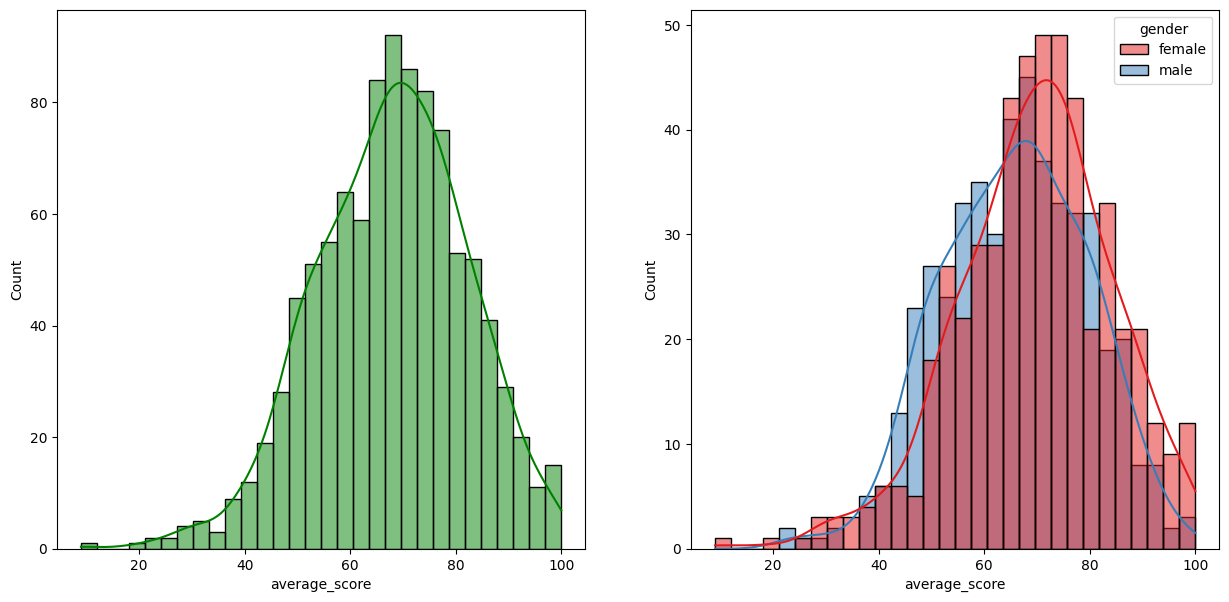

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color="green")
plt.subplot(122)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue="gender", palette="Set1")
plt.show()

- The maximum average score is 70.
- The count average_score of females is higher than that of males.
- Most of the male students have scored less than 70 marks in average as compared to female students.
- The average score less than 40 has more females than males.

### Visualization with respect to the type of lunch the students have against average marks and gender.

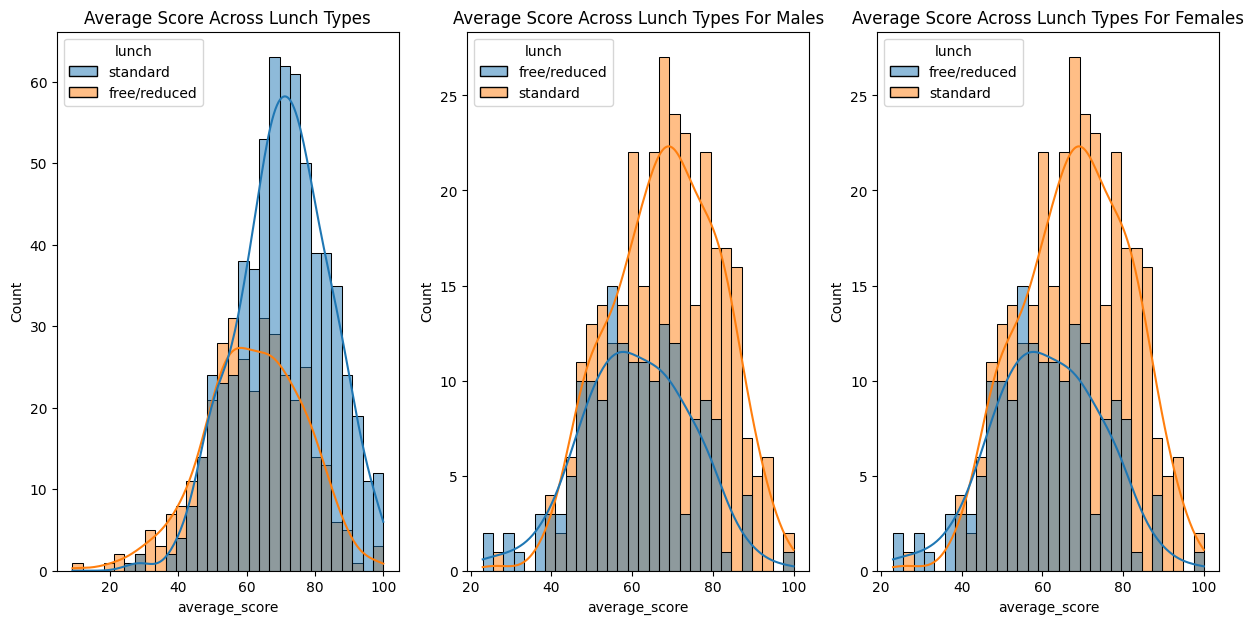

In [13]:
fig, axis = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue="lunch")
plt.title("Average Score Across Lunch Types")
plt.subplot(132)
sns.histplot(data=df[df["gender"] == "male"], x='average_score', bins=30, kde=True, hue="lunch")
plt.title("Average Score Across Lunch Types For Males")
plt.subplot(133)
sns.histplot(data=df[df["gender"] == "male"], x='average_score', bins=30, kde=True, hue="lunch")
plt.title("Average Score Across Lunch Types For Females")
plt.show()

- Students who take standard lunch have scored more than that of free/reduced lunch.

### Visulazation with respect to the type of race/ethnicity the students belongs to against average marks and gender.

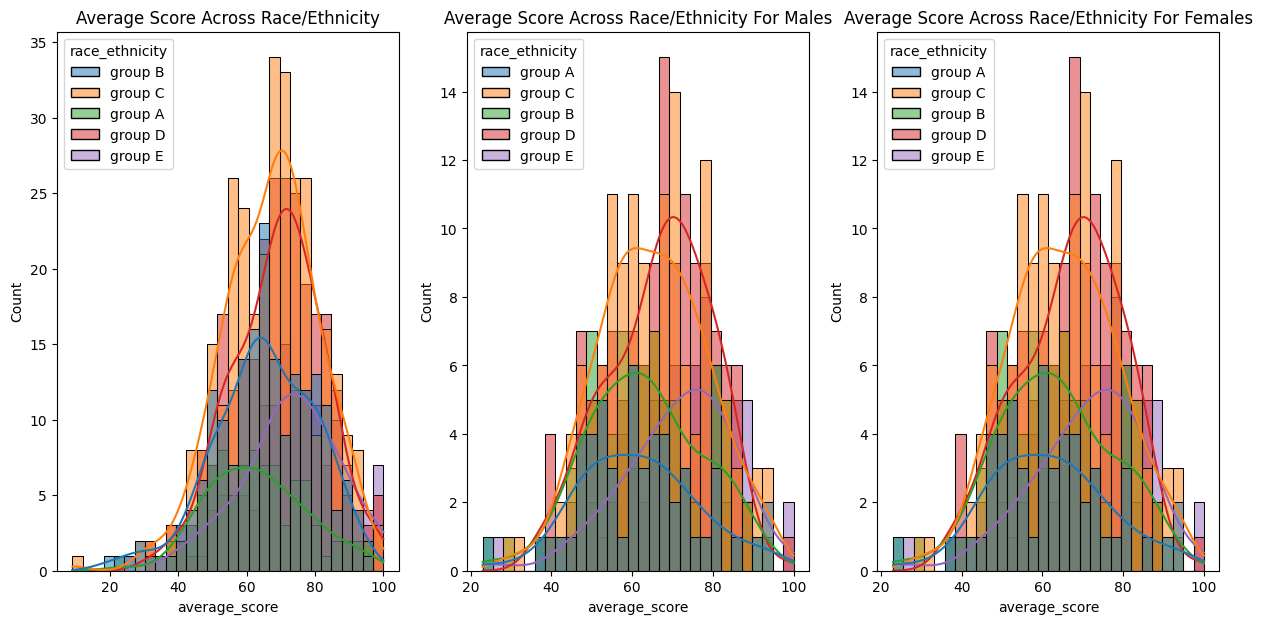

In [14]:
fig, axis = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df, x='average_score', bins=30, kde=True, hue="race_ethnicity")
plt.title("Average Score Across Race/Ethnicity")
plt.subplot(132)
sns.histplot(data=df[df["gender"] == "male"], x='average_score', bins=30, kde=True, hue="race_ethnicity")
plt.title("Average Score Across Race/Ethnicity For Males")
plt.subplot(133)
sns.histplot(data=df[df["gender"] == "male"], x='average_score', bins=30, kde=True, hue="race_ethnicity")
plt.title("Average Score Across Race/Ethnicity For Females")
plt.show()

<Axes: xlabel='race_ethnicity', ylabel='average_score'>

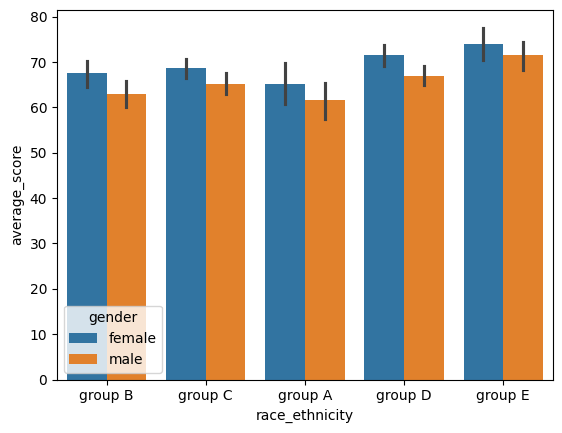

In [15]:
sns.barplot(data=df, x="race_ethnicity", y="average_score", hue="gender")

- The Histogram plot shows us that the group C students are more in number than the other groups.
- The bar plot shows us that the average marks of students in group E is the most irrespective of the gender followed by group D, group c, group B, group A.

### Visualization with respect to the parental level of education against average marks and gender.

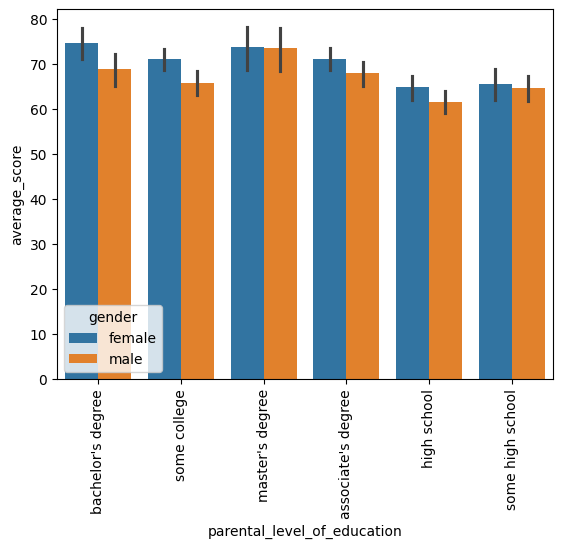

In [29]:
sns.barplot(data=df, x="parental_level_of_education", y="average_score", hue="gender")
plt.xticks(rotation=90)
plt.show()

- Parental Level of Education doesn't have much impact

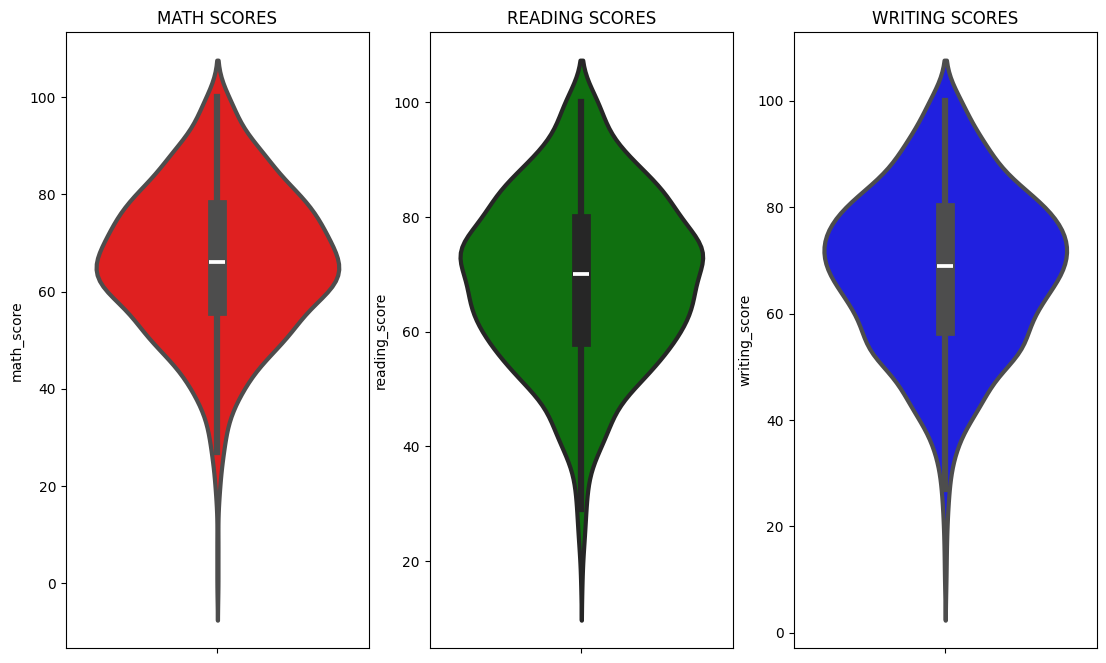

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

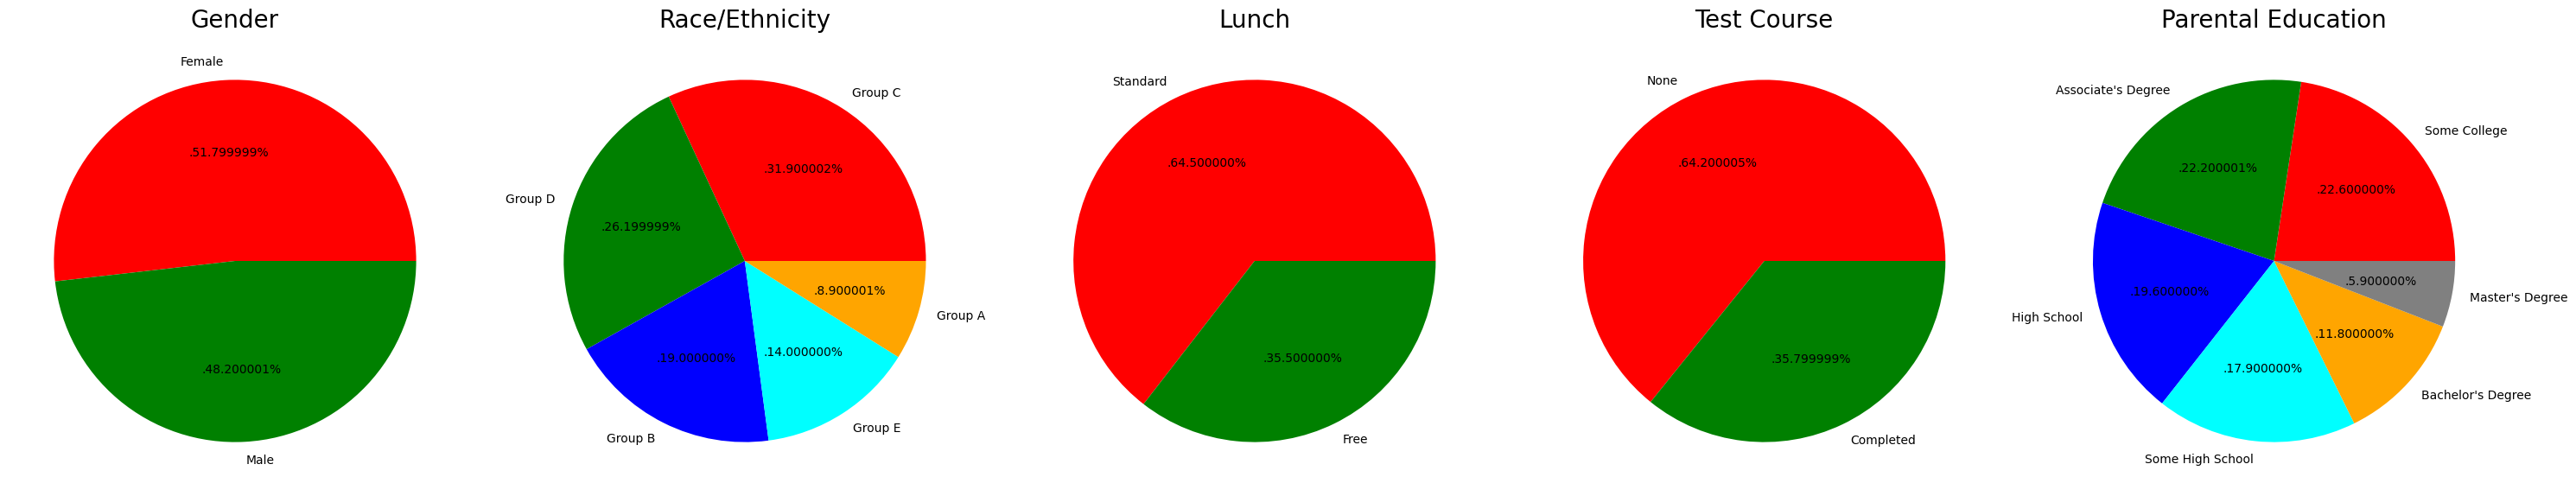

In [33]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## Feature Wise visualization

### GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

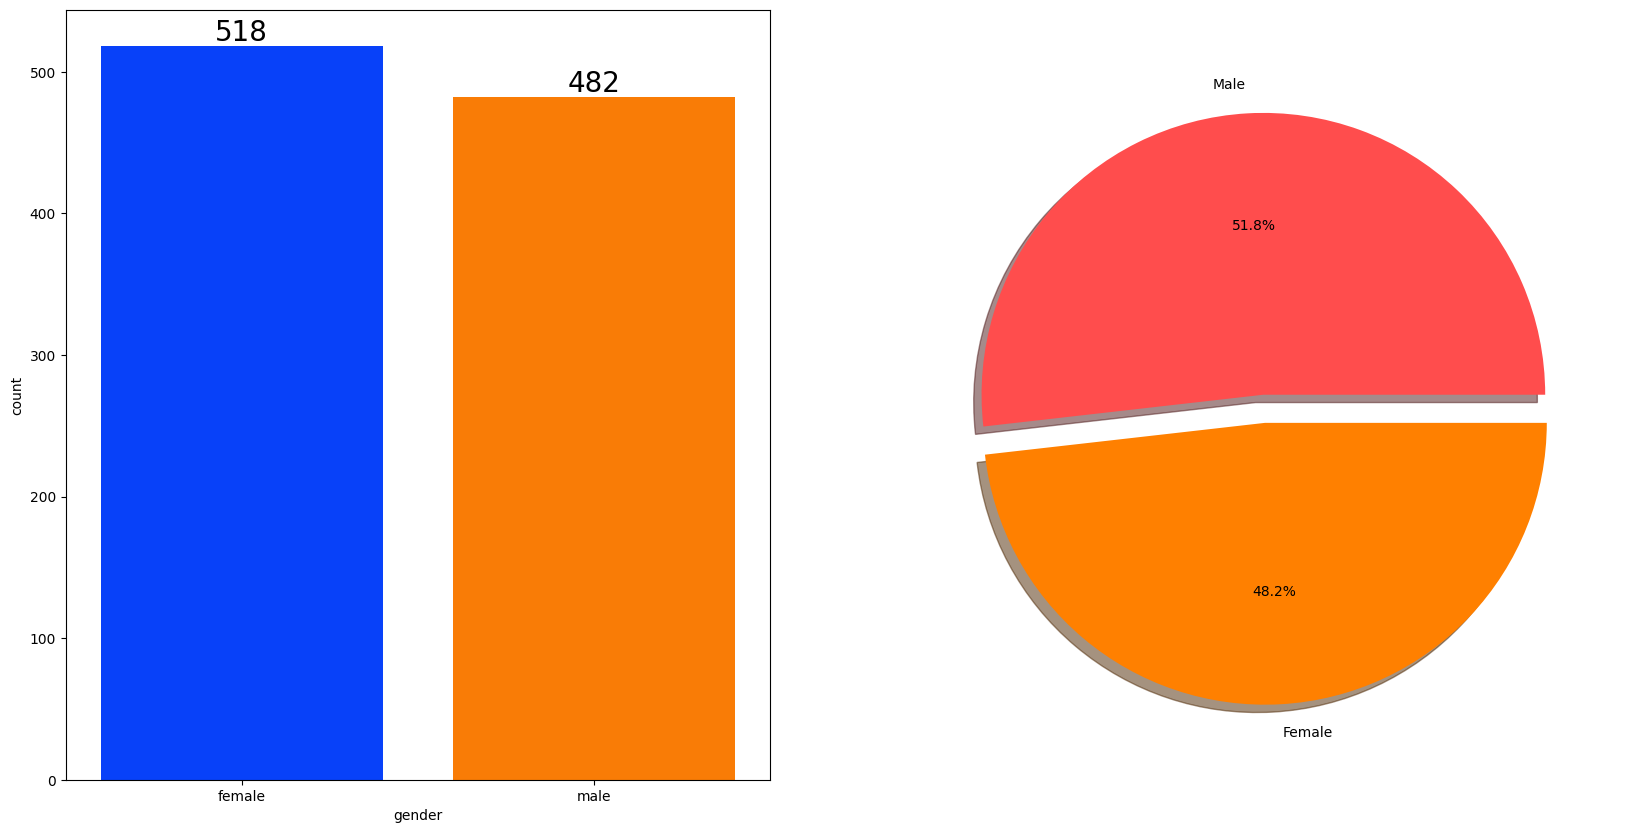

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [53]:
gender_group = df.groupby('gender')[["average_score", 'math_score']].mean().reset_index()
gender_group

,gender,average_score,math_score
0,female,69.569498,63.633205
1,male,65.837303,68.728216


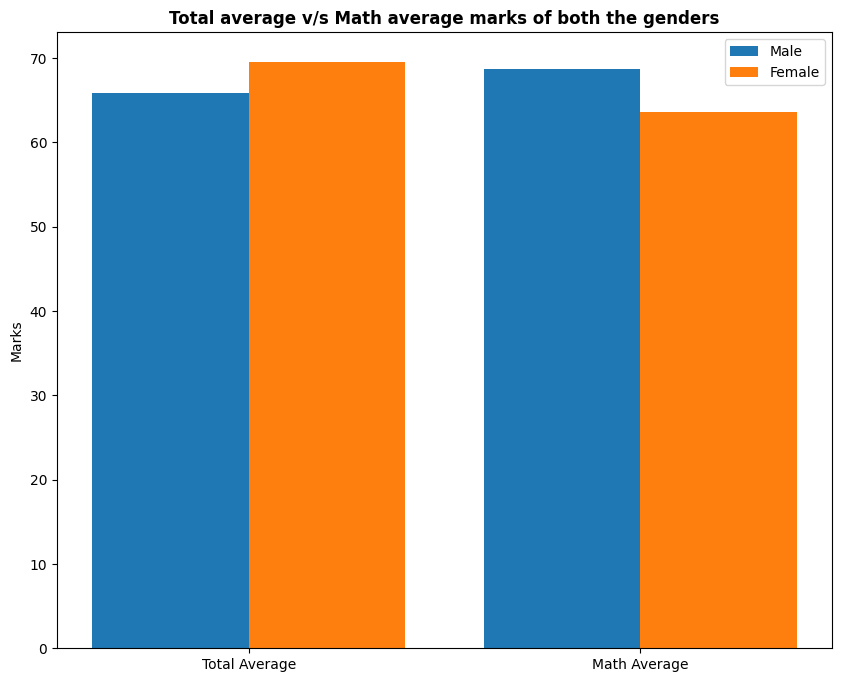

In [54]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

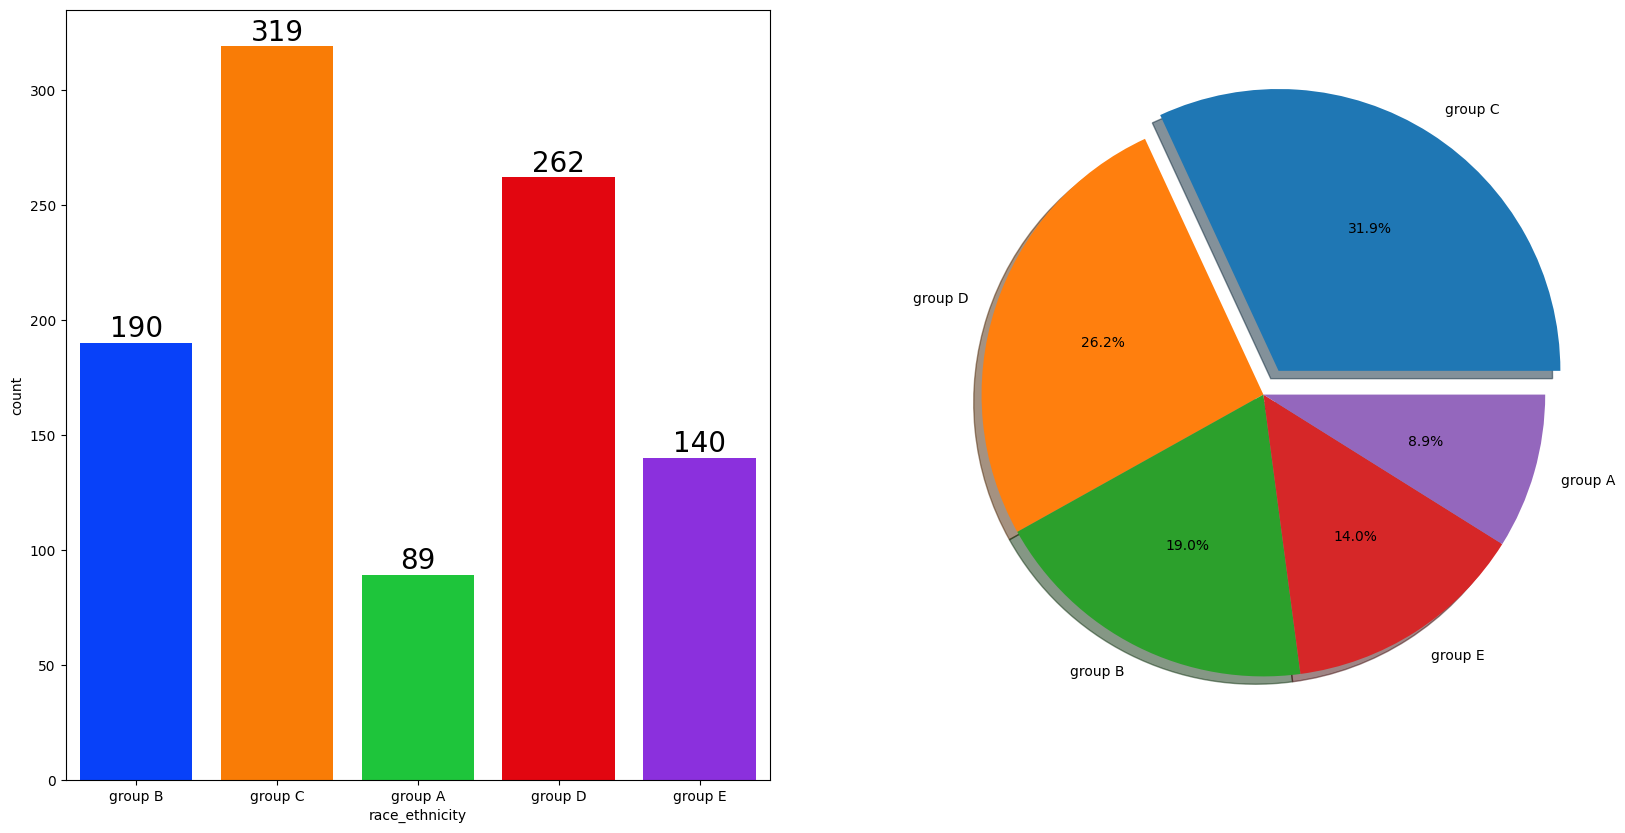

In [56]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

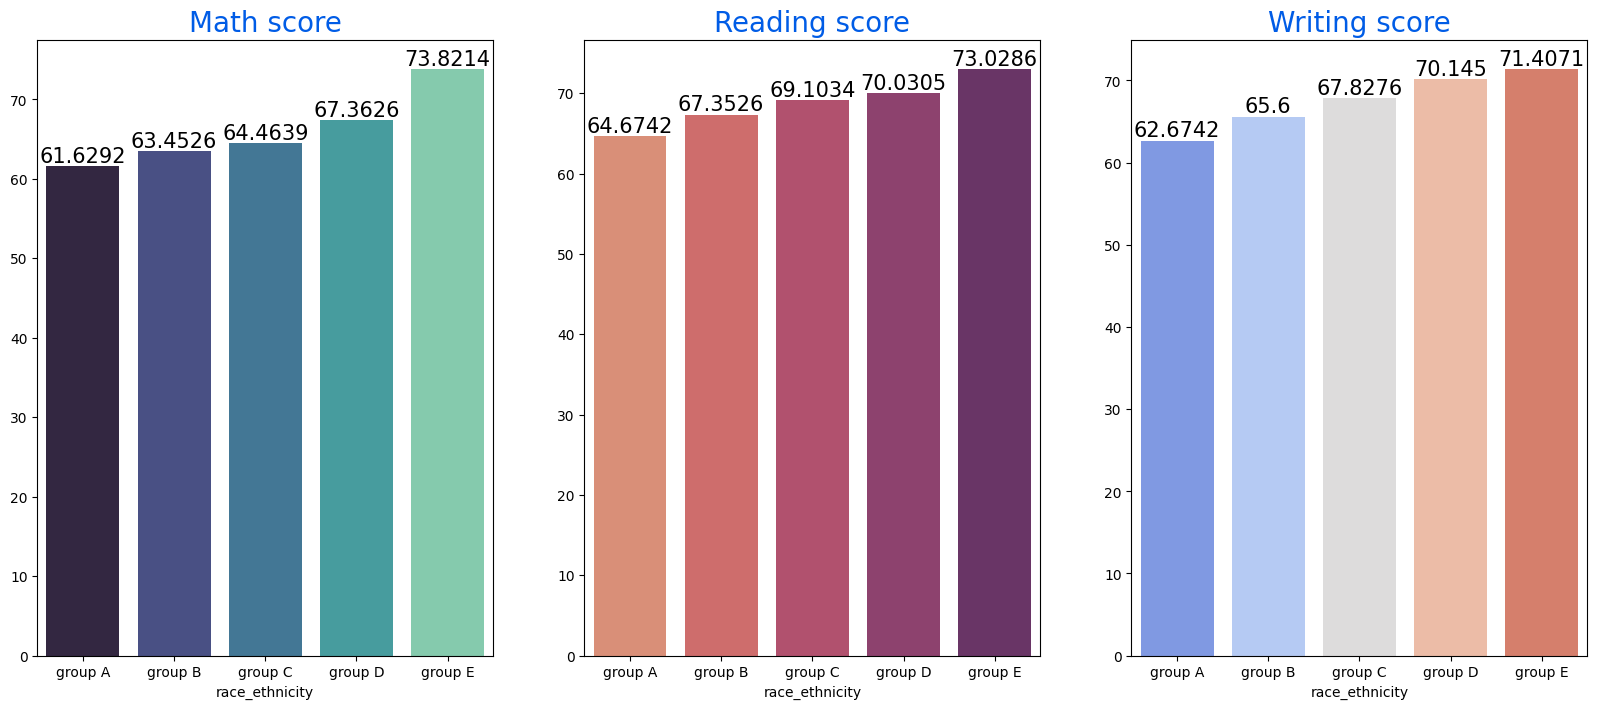

In [57]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

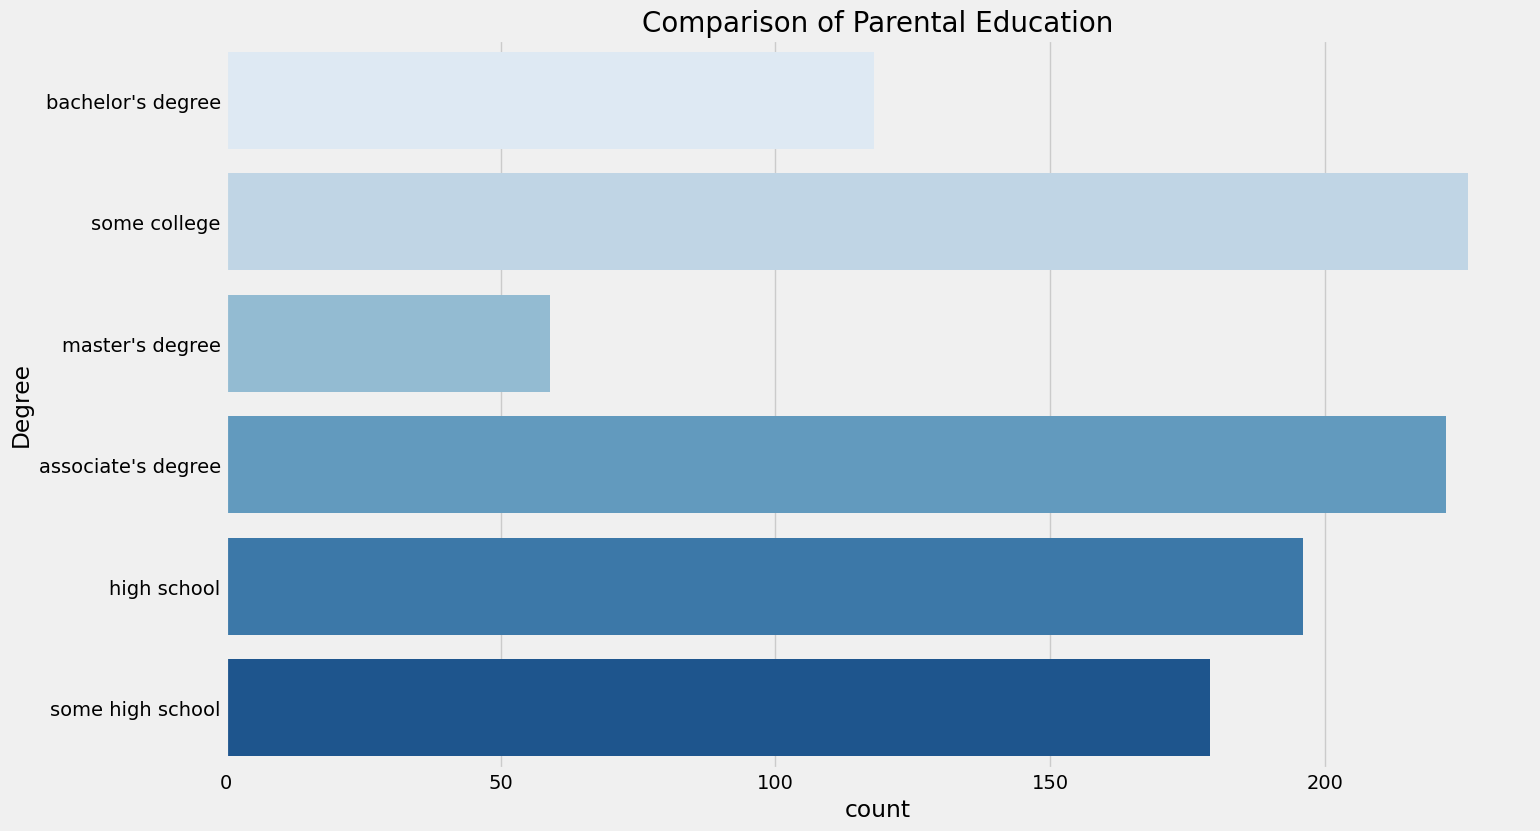

In [59]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.ylabel('Degree')
plt.xlabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

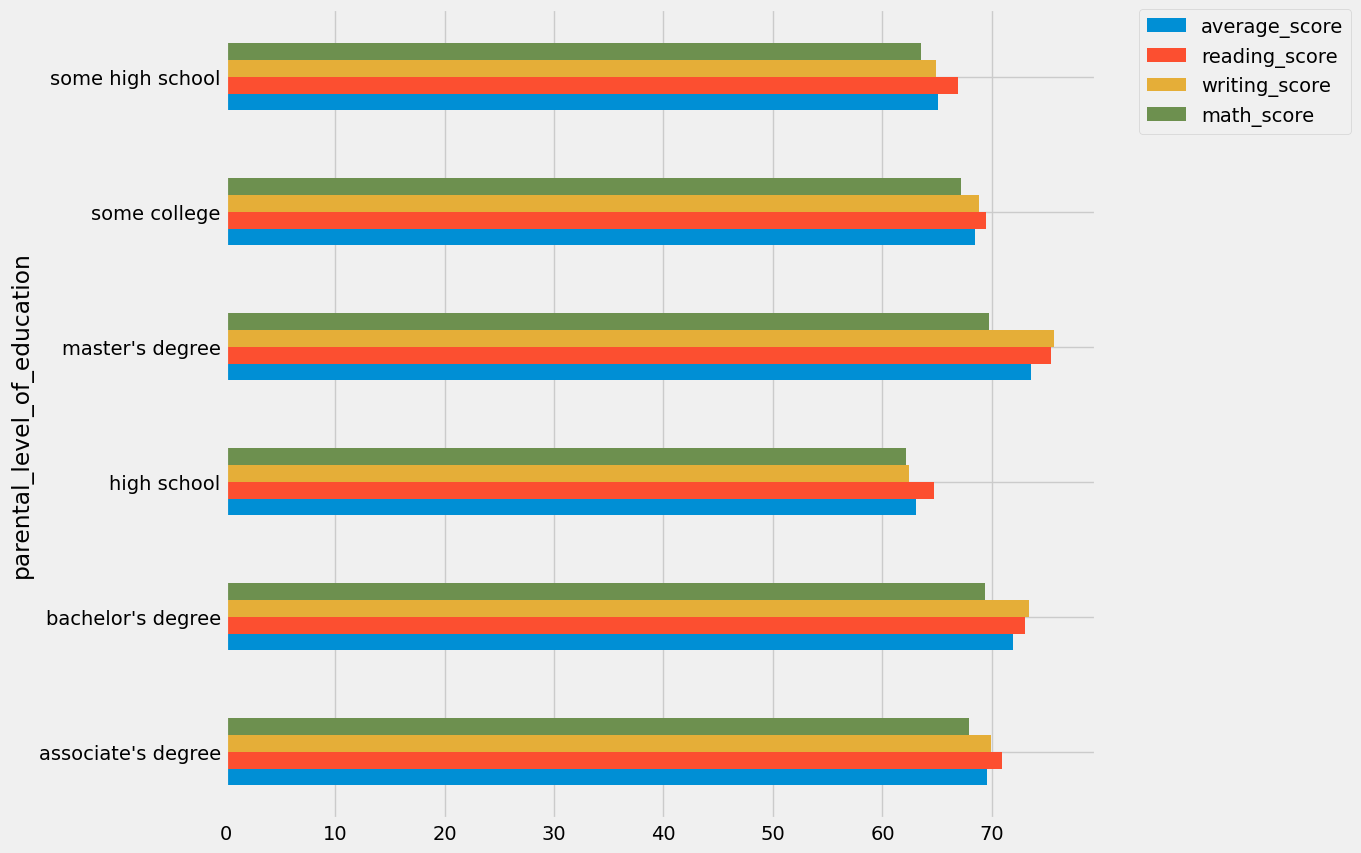

In [63]:
df.groupby('parental_level_of_education')[["average_score", "reading_score", "writing_score", "math_score"]].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

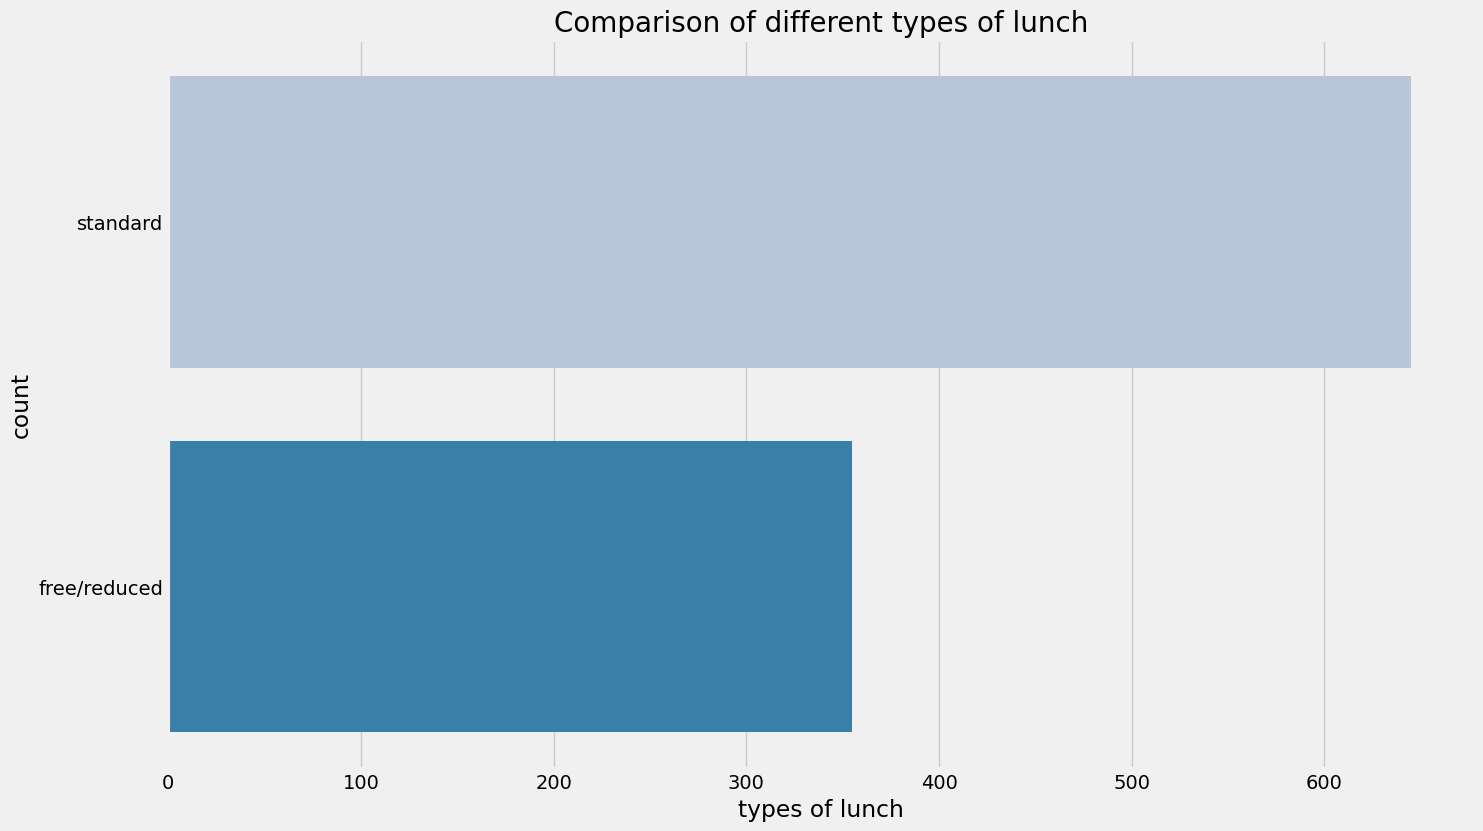

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

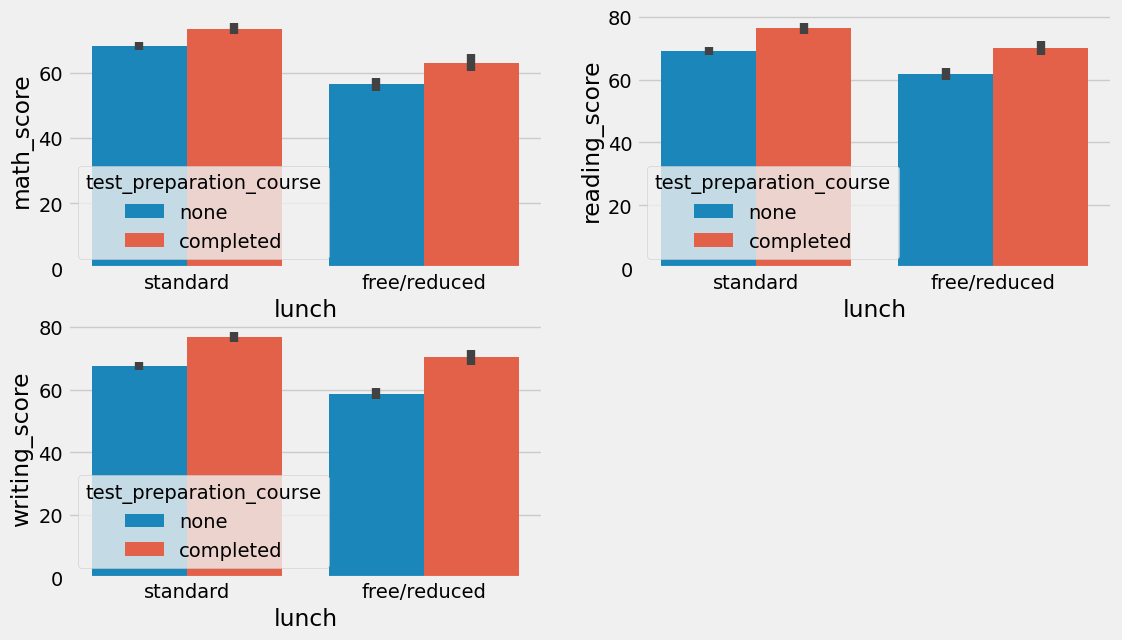

In [77]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

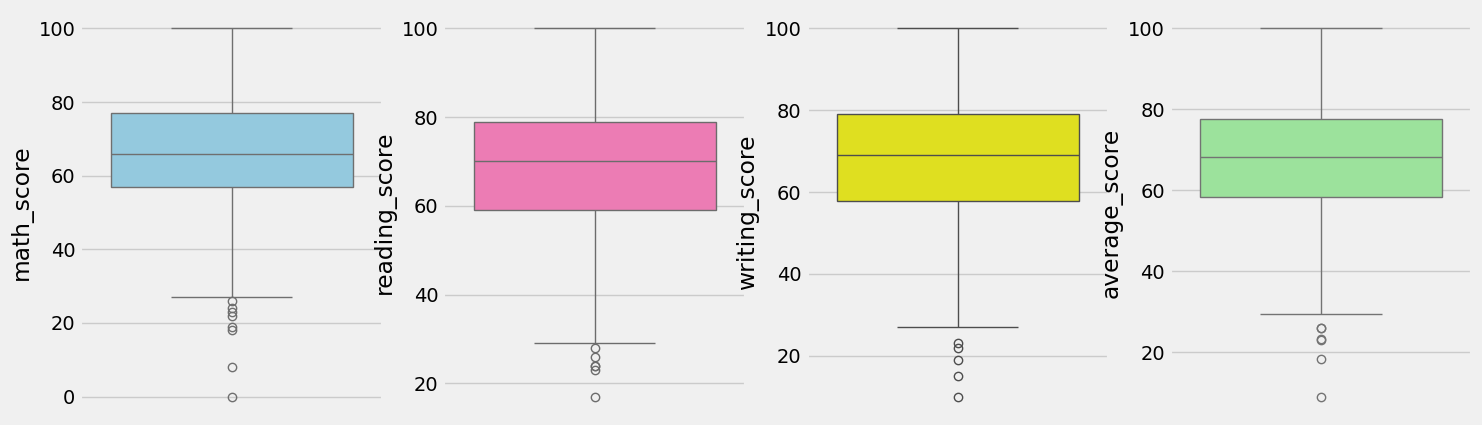

In [78]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

## Conclusion

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Finishing preparation course is benefitial.